Abalone case study. Its a regression problem since the target variable is numeric in nature

In [205]:
import pandas as pd
import numpy as np
import math
import scipy
import joblib
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [193]:
# Lets begin by reading the csv file
Abalone1=pd.read_csv("Abalone.csv")
Abalone1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [194]:
#Lets convert the csv file into a DataFrame
Abalone=pd.DataFrame(data=Abalone1)
Abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [195]:
Abalone.shape
# The dataset has 4177 rows and 9 columns

(4177, 9)

In [196]:
Abalone.dtypes
#The target variable is an integer the other independent variables are floats and sex is object type.

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [197]:
type(Abalone)

pandas.core.frame.DataFrame

In [198]:
Abalone.describe()
#The difference between median and mean is not much hence more or less its a normal distribution
#The difference between the maximum and the 75th percentile is the most for whole weight hence it must be having quite a few outliers compared to other attributes
#The spread of the data is a small value hence the data is not very wide spread.The maximum spreaad of data would be in the whole weight attribute compared to the other attributes.

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [187]:
Abalone.isnull().sum()
#There seems to be no missing values which can be confirmed with the heat map as well.

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

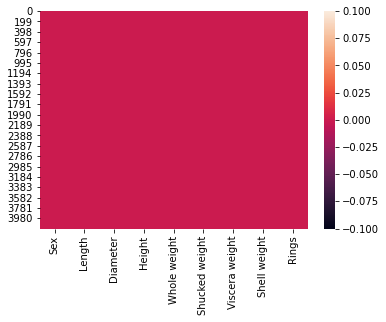

In [188]:
#Lets plot the heatmap to confirm there are no missing values
sns.heatmap(Abalone.isnull())
#It confirms that there are no missing values.

In [189]:
#Lets convert the gender attribute(nominal) to numeric values using one hot label 
le=LabelEncoder()
Abalone["Sex"]=le.fit_transform(Abalone["Sex"])
Abalone["Sex"]

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int32

In [190]:
#Abalone.value_counts("Sex")
Abalone["Sex"].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [191]:
#Lets perform univariate analysis on the attributes

<AxesSubplot:xlabel='Sex', ylabel='count'>

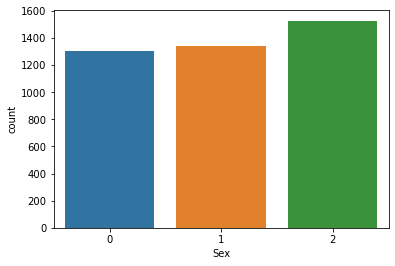

In [22]:
sns.countplot(Abalone["Sex"])
#The count of males is the most followed by females and then infants

<AxesSubplot:xlabel='Length'>

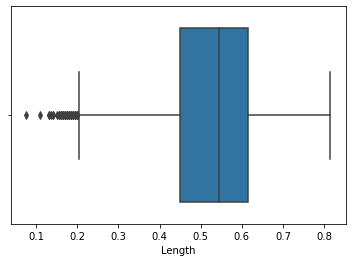

In [23]:
sns.boxplot(Abalone["Length"])
#Outliers present are below  25the percentile.
#Minimum length is around 0.075, median length is around 0.545 amd maximum length is around 0.815

<AxesSubplot:xlabel='Length', ylabel='Density'>

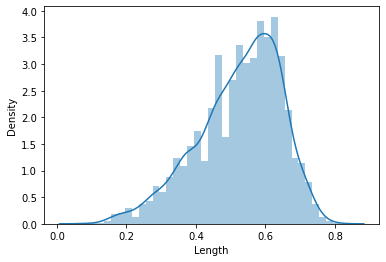

In [32]:
sns.distplot(Abalone["Length"])
#The graph is slighthly left skewed which confirms the presence of outliers blow the minimum point.
#the maximum density lies between 0.5 and 0.7 length

<AxesSubplot:xlabel='Diameter'>

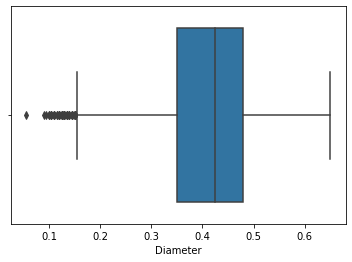

In [25]:
sns.boxplot(Abalone["Diameter"])
#Outliers present are below  2th percentile.
#Minimum diameter is around 0.055, median diameter is around 0.425 amd maximum diameter is around 0.65

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

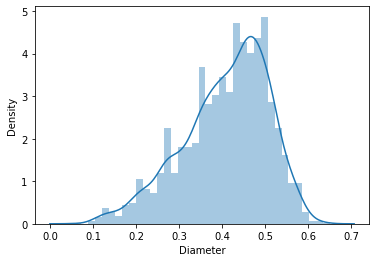

In [27]:
sns.distplot(Abalone["Diameter"])
#The graph is slighthly left skewed which confirms the presence of outliers blow the minimum point.
#the maximum density lies between 0.4 and 0.5 diameter

<AxesSubplot:xlabel='Height'>

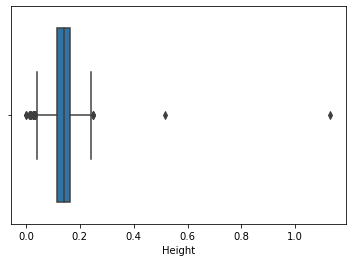

In [28]:
sns.boxplot(Abalone["Height"])
#Outliers present below 25th percentile and above 75th percentile.
#Minimum height is around 0, median height is around 0.14 amd maximum height is around 1.13

<AxesSubplot:xlabel='Height', ylabel='Density'>

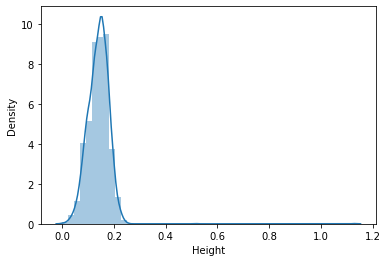

In [29]:
sns.distplot(Abalone["Height"])
#The graph is  right skewed.
#Maximum density lies around 0.1 height

<AxesSubplot:xlabel='Whole weight'>

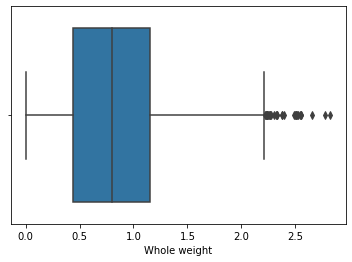

In [30]:
sns.boxplot(Abalone["Whole weight"])
#Outliers present above the 75th percentile.
#Minimum whole weight is around 0, median whole weight is around 0.8 amd maximum whole weight is around 2.82

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

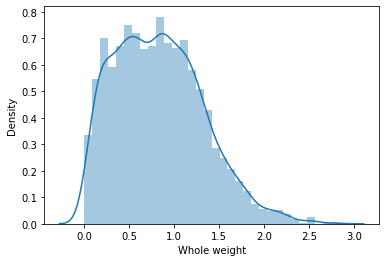

In [31]:
sns.distplot(Abalone["Whole weight"])
#The graph is right skewed with maximum desnity of whole weight between 0.5 to 1.2

<AxesSubplot:xlabel='Shucked weight'>

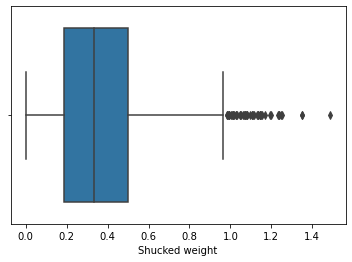

In [33]:
sns.boxplot(Abalone["Shucked weight"])
#Outliers present above the 75th percentile.
#Minimum shucked weight is around 0, median shucked weight is around 0.336 amd maximum shucked weight is around 1.48

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

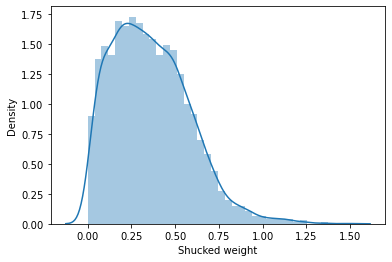

In [34]:
sns.distplot(Abalone["Shucked weight"])
#The graph is right skewed with maximum desnity of shucked weight between 0.125 to 0.5

<AxesSubplot:xlabel='Viscera weight'>

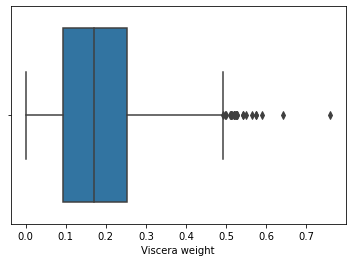

In [35]:
sns.boxplot(Abalone["Viscera weight"])
#Outliers present above the 75th percentile.
#Minimum viscera weight is around 0, median viscera weight is around 0.171 amd maximum viscera weight is around 0.76

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

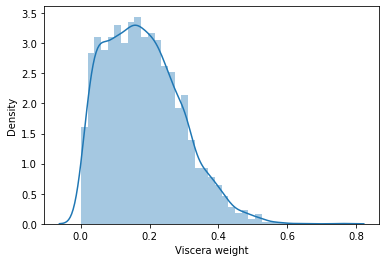

In [36]:
sns.distplot(Abalone["Viscera weight"])
#The graph is right skewed with maximum desnity of shucked weight between 0.05 to 0.25

<AxesSubplot:xlabel='Shell weight'>

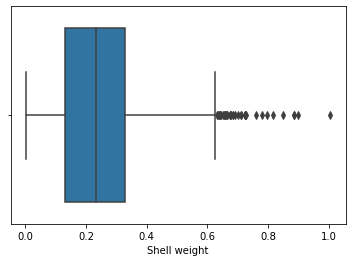

In [37]:
sns.boxplot(Abalone["Shell weight"])
#Outliers present above the 75th percentile.
#Minimum shell weight is around 0, median shell weight is around 0.234 amd maximum shell weight is around 1

In [38]:
#lets perform bivariate analysis between dependent and independent variables

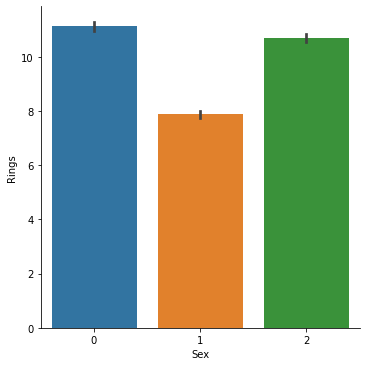

In [46]:
sns.catplot(x="Sex",y="Rings",kind="bar",data=Abalone)
# The most number of rings are present in infants and the least number of rings are present in the females

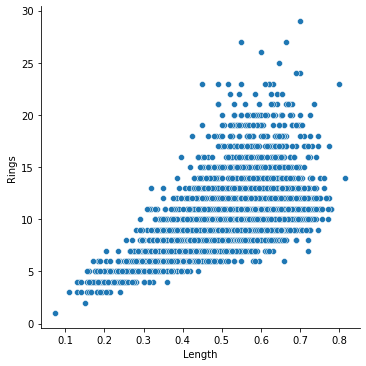

In [48]:
sns.relplot(x="Length",y="Rings",kind="scatter",data=Abalone)
#The number of rings increase with the increase in the length but then decreases even with an increase in the lenght

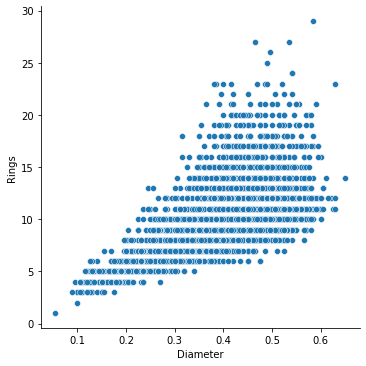

In [65]:
sns.relplot(x="Diameter",y="Rings",kind="scatter",data=Abalone)
#The number of rings increase with the increase in the diameter but then decreases even with an increase in the diameter

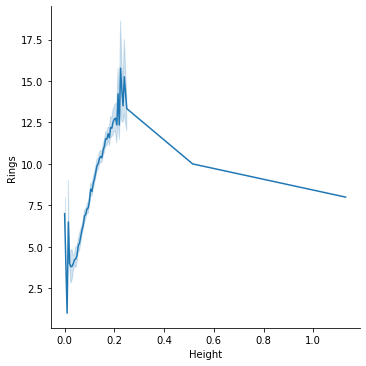

In [53]:
sns.relplot(x="Height",y="Rings",kind="line",data=Abalone)
#The number of rings peak at height of around 0.3 and then the number of rings drop.

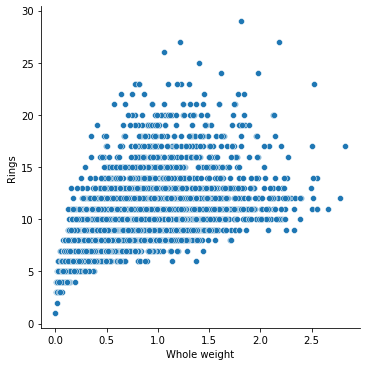

In [59]:
sns.relplot(x="Whole weight",y="Rings",kind="scatter",data=Abalone)
#The number of rings increase with the increase in the whole weight

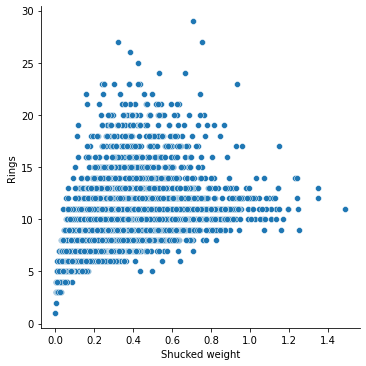

In [62]:
sns.relplot(x="Shucked weight",y="Rings",kind="scatter",data=Abalone)
# The number of rings increase with the increase in shucked weight but then decrease even with the increase in the shucked weight

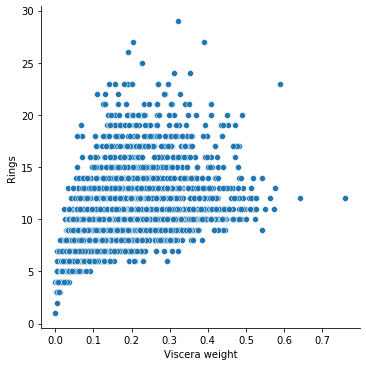

In [63]:
sns.relplot(x="Viscera weight",y="Rings",kind="scatter",data=Abalone)
# The number of rings increase with the increase in viscera weight but then decrease even with the increase in the shucked weight

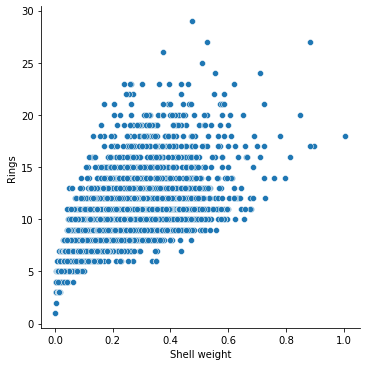

In [64]:
sns.relplot(x="Shell weight",y="Rings",kind="scatter",data=Abalone)
# The number of rings increase with the increase in shell weight but then decrease even with the increase in the shucked weight

In [68]:
#lets check for the removal of outliers using zscore method

In [69]:
zscore(Abalone)

array([[ 1.15198011, -0.57455813, -0.43214879, ..., -0.72621157,
        -0.63821689,  1.57154357],
       [ 1.15198011, -1.44898585, -1.439929  , ..., -1.20522124,
        -1.21298732, -0.91001299],
       [-1.28068972,  0.05003309,  0.12213032, ..., -0.35668983,
        -0.20713907, -0.28962385],
       ...,
       [ 1.15198011,  0.6329849 ,  0.67640943, ...,  0.97541324,
         0.49695471, -0.28962385],
       [-1.28068972,  0.84118198,  0.77718745, ...,  0.73362741,
         0.41073914,  0.02057072],
       [ 1.15198011,  1.54905203,  1.48263359, ...,  1.78744868,
         1.84048058,  0.64095986]])

In [71]:
z=np.abs(zscore(Abalone))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [74]:
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [75]:
Abalone_New=Abalone[(z<3).all(axis=1)]

In [76]:
Abalone_New.shape
#Since the data loss is less than 5-7% we can proceed with the dataset obtained after removal of outliers

(4027, 9)

In [78]:
#Lets perform multivariate analysis using heatmap to draw relationships between independent variables and target variables

<AxesSubplot:>

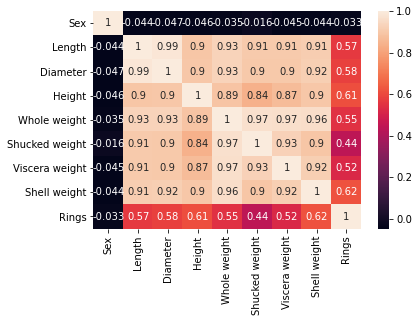

In [81]:
sns.heatmap(Abalone_New.corr(), annot=True)

In [85]:
Abalone_New_corr=Abalone_New.corr()
Abalone_New_corr["Rings"].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.622872
Height            0.612540
Diameter          0.584978
Length            0.567074
Whole weight      0.548295
Viscera weight    0.522917
Shucked weight    0.440424
Sex              -0.033272
Name: Rings, dtype: float64

In [88]:
#Lets check for skewness after outlier removal

Abalone_New.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

In [ ]:
# as per our observation, lets remove skewness from the attributes where the values are greater thaan 0.5 which are length and diameter

In [95]:
Abalone_New["Length"]=power_transform(Abalone_New["Length"].values.reshape(-1,1))
Abalone_New["Diameter"]=power_transform(Abalone_New["Diameter"].values.reshape(-1,1))
Abalone_New.skew()

Sex              -0.094886
Length            0.013913
Diameter          0.007517
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

In [96]:
#Lets start with machine learning but before that we need to separate the independent variables from the target variables

In [99]:
x=Abalone_New.iloc[:,0:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,-0.697235,-0.559688,0.095,0.5140,0.2245,0.1010,0.1500
1,2,-1.387830,-1.379711,0.090,0.2255,0.0995,0.0485,0.0700
2,0,-0.072651,0.012779,0.135,0.6770,0.2565,0.1415,0.2100
3,2,-0.807889,-0.559688,0.125,0.5160,0.2155,0.1140,0.1550
4,1,-1.499078,-1.448659,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.266040,0.370901,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.528437,0.247689,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.638291,0.696131,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.925465,0.833254,0.150,1.0945,0.5310,0.2610,0.2960


In [101]:
y=Abalone_New.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

In [107]:
#lets apply standard scaler to x variables
S=StandardScaler()
x=S.fit_transform(x)
x

array([[ 1.15969763, -0.6972354 , -0.55968799, ..., -0.6037333 ,
        -0.72305677, -0.63065934],
       [ 1.15969763, -1.38782952, -1.37971098, ..., -1.20941043,
        -1.23110406, -1.25603283],
       [-1.28538214, -0.07265078,  0.01277889, ..., -0.44867996,
        -0.33113458, -0.16162923],
       ...,
       [ 1.15969763,  0.63829105,  0.69613066, ...,  0.85473721,
         1.08172072,  0.60445329],
       [-1.28538214,  0.92546456,  0.83325383, ...,  0.88138701,
         0.82527781,  0.51064727],
       [ 1.15969763,  2.04311366,  1.91215437, ...,  2.88981235,
         1.94298183,  2.06626381]])

In [108]:
x.shape
# the number of row are 4027 and 8 columns

(4027, 8)

In [109]:
y.shape
#the number of rows are 4027 and 1 target variable

(4027,)

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3221, 8)
(806, 8)
(3221,)
(806,)


In [137]:
#Lets use 4 algorithms to check the score which are: 1) Linear regression,2)SVR ,3)lasso,4) ridge

In [163]:
#1) Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)
#lets predict the y values
pred1=lr.predict(x_test)
print(r2_score(y_test,pred1))
score1=cross_val_score(lr,x,y,cv=5)
print(score1)
print(score1.mean())
print(score1.std())

[ 0.03357804 -0.44960264  0.84019797  1.08730368  3.18872215 -3.48705926
 -0.63602348  1.06460591]
9.747443248486562
0.5095206387607703
[0.38033853 0.2226741  0.49013587 0.49289557 0.46055822]
0.409320456222685
0.10180182231319602


In [161]:
#2) SVR
svr=SVR()
svr.fit(x_train,y_train)
#predict y values
pred2=svr.predict(x_test)
print(r2_score(y_test,pred2))
score2=cross_val_score(svr,x,y,cv=5)
print(score2)
print(score2.mean())
print(score2.std())

0.5354713986095911
[0.33877766 0.49688772 0.49961594 0.55185923 0.56623062]
0.4906742344495699
0.08080037314436517


In [199]:
#3) lasso
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
#predict y values
pred3=ls.predict(x_test)
print(r2_score(y_test,pred3))
score3=cross_val_score(ls,x,y,cv=5)
print(score3)
print(score3.mean())
print(score3.std())

0.5094994983048157
[0.38011678 0.22275895 0.49015023 0.49300327 0.46061423]
0.4093286926403076
0.1018090034860046


In [179]:
#4) Ridge
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
#predict y values
pred4=rd.predict(x_test)
print(r2_score(y_test,pred4))
score4=cross_val_score(rd,x,y,cv=5)
print(score4)
print(score4.mean())
print(score4.std())

0.5095205983507166
[0.38033839 0.22267421 0.49013588 0.49289573 0.46055823]
0.40932048907015683
0.10180181739432019


In [168]:
# the best fit model is svr so lets hypertune it using gridsearch cv

In [200]:
parameters={"kernel":["rbf","poly"],"degree":[5],"gamma":["scale","auto"],"C":[1,10]}
rsearch=RandomizedSearchCV(svr,parameters)
rsearch.fit(x_train,y_train)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': [1, 10], 'degree': [5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'poly']})

In [201]:
print(rsearch.best_estimator_)
print(rsearch.best_score_)
print(rsearch.best_params_)

SVR(C=10, degree=5)
0.5450314939844585
{'kernel': 'rbf', 'gamma': 'scale', 'degree': 5, 'C': 10}


In [204]:
#Now put these parameters back to best fit model which is svc
svr=SVR(kernel="rbf",gamma="scale",degree=5,C=10)
svr.fit(x_train,y_train)
#predict y values
pred2=svr.predict(x_test)
print(r2_score(y_test,pred2))


0.5504292308833667


In [206]:
#Lets perform serialisation and dump the model for further use
joblib.dump(svr,"svrfile.obj")

['svrfile.obj']